In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [2]:
# Load the data
data = pd.read_csv("C:/Users/jssri/Downloads/Dataset/AMZN.csv")

# Display the first few rows
print(data.head())


         Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200


In [3]:
# Extract the 'Close' prices
closing_prices = data['Close'].values #Extracts the 'Close' column values as a NumPy array.

# Reshape data for MinMaxScaler
closing_prices = closing_prices.reshape(-1, 1) #Reshapes the array to have one column and as many rows as necessary.

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) #Initializes the scaler to scale data to a range of 0 to 1.
scaled_closing_prices = scaler.fit_transform(closing_prices)


create_sequences: A function that creates sequences of a given time step.
X and y: Lists to hold the input sequences and corresponding output values.
for i in range(len(data) - time_step): Iterates over the data to create sequences.
X.append(data[i:i + time_step]): Appends a sequence of 10 days' data to X.
y.append(data[i + time_step]): Appends the corresponding value at the next time step to y.
np.array(X), np.array(y): Converts the lists to NumPy arrays.

In [4]:
def create_sequences(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_sequences(scaled_closing_prices, time_step)


In [5]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [6]:
# Building the RNN model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
130/130 [==============================] - 0s 3ms/step - loss: 2.5052e-06 - val_loss: 1.6913e-05
Epoch 2/50
130/130 [==============================] - 0s 3ms/step - loss: 2.5781e-06 - val_loss: 2.0188e-05
Epoch 3/50
130/130 [==============================] - 0s 3ms/step - loss: 2.3471e-06 - val_loss: 2.0095e-05
Epoch 4/50
130/130 [==============================] - 0s 3ms/step - loss: 2.1712e-06 - val_loss: 1.6625e-05
Epoch 5/50
130/130 [==============================] - 0s 3ms/step - loss: 2.4277e-06 - val_loss: 1.5365e-05
Epoch 6/50
130/130 [==============================] - 0s 3ms/step - loss: 2.5858e-06 - val_loss: 1.9481e-05
Epoch 7/50
130/130 [==============================] - 0s 3ms/step - loss: 2.4523e-06 - val_loss: 1.6729e-05
Epoch 8/50
130/130 [==============================] - 1s 4ms/step - loss: 2.3346e-06 - val_loss: 1.4731e-05
Epoch 9/50
130/130 [==============================] - 0s 4ms/step - loss: 2.2993e-06 - val_loss: 2.2579e-05
Epoch 10/50
130/130 [=======

In [11]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

36/36 [==============================] - 0s 2ms/step
Train RMSE: 0.0017065010520197967
Test RMSE: 0.01714437990465877


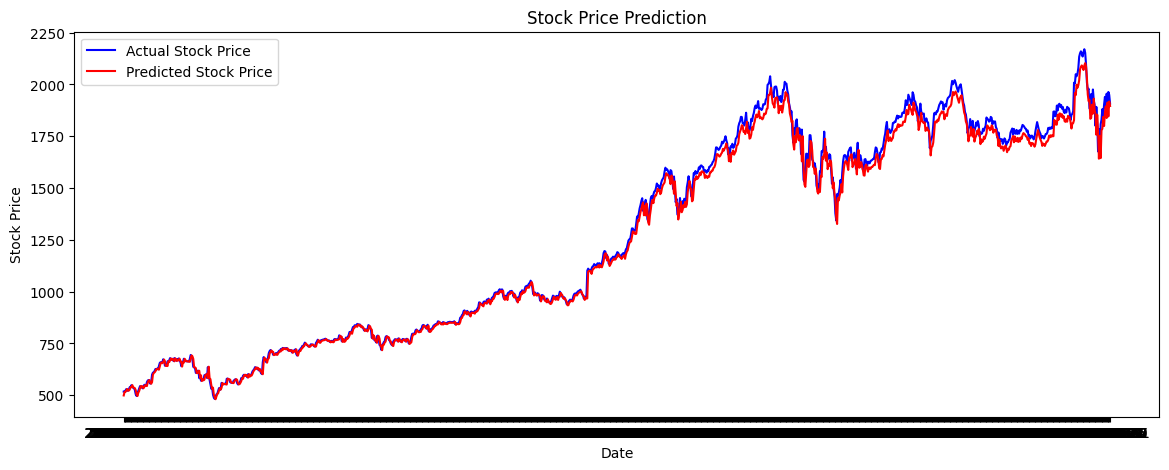

In [13]:
# Plotting
plt.figure(figsize=(14, 5))
plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(data['Date'][-len(test_predict):], test_predict, color='red', label='Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()
